### **Definir el directorio de trabajo con Google Colab**
Define el directorio de trabajo como la carpeta `data` de la carpeta compartida `DS4A-Team12` de Drive.

In [ ]:
import os
from google.colab import drive 
# Enlazar a la carpeta data de la carpeta compartida en Drive
drive.mount('/content/drive')
working_dir = '/content/drive/MyDrive/DS4A-Team12/data'
os.chdir(working_dir)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DS4A-Team12/data


In [ ]:
# Librerias relevantes 
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as smm
import os
from scipy import stats, special
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from matplotlib import pyplot
%matplotlib inline
plt.style.use('ggplot')

# Opciones de visualización
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

### **Abrir base de datos unidos**
Abre el archivo `Sociodemo_pre.parquet` (5945349 registros, 148 MB) como un dataframe de nombre `soc`, con toda la base de datos, preprocesada para asignarle a cada variable el tipo de dato correspondiente.

Abre también el diccionario del archivo `sociodemo_datatypes_low_memo.json` que permite asignar a las variables tipos de datos para un uso más eficiente de la memoria (641 MB).

In [ ]:
import json
# Abre el diccionario con la estructura de datos definida|
soc_datatypes_file = open('datatypes_dictionaries/sociodemo_datatypes_low_memo.json', 'r')
soc_datatypes = json.load(soc_datatypes_file)
# Abre el dataframe
df = pd.read_parquet('preprocessed_data/join_sociodemo_tagged.parquet')
df = df.astype(soc_datatypes)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990773 entries, 0 to 990772
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Cod_clase                 990773 non-null  category      
 1   Ind_grupo_sisben_4        990773 non-null  category      
 2   Ind_nivel_sisben_4        990773 non-null  UInt8         
 3   Tip_vivienda              990773 non-null  float64       
 4   Ind_tiene_energia         990773 non-null  float64       
 5   Ind_tiene_alcantarillado  990773 non-null  float64       
 6   Ind_tiene_gas             990773 non-null  float64       
 7   Ind_tiene_recoleccion     990773 non-null  float64       
 8   Ind_tiene_acueducto       990773 non-null  float64       
 9   Num_hogares_vivienda      990773 non-null  float64       
 10  Tip_ocupa_vivienda        990773 non-null  float64       
 11  Ind_tiene_cocina          990773 non-null  float64       
 12  In

In [ ]:
df.head()

,Cod_clase,Ind_grupo_sisben_4,Ind_nivel_sisben_4,Tip_vivienda,Ind_tiene_energia,Ind_tiene_alcantarillado,Ind_tiene_gas,Ind_tiene_recoleccion,Ind_tiene_acueducto,Num_hogares_vivienda,Tip_ocupa_vivienda,Ind_tiene_cocina,Ind_tiene_nevera,Ind_tiene_lavadora,Ind_tiene_pc,Ind_tiene_internet,Num_personas_hogar,Sexo,Ind_discap_ninguna,Tip_seg_social,Ind_acudio_salud,Ind_fue_atendido_salud,Tip_cuidado_niños,Ind_recibe_comida,Ind_leer_escribir,Ind_estudia,privado_logroeduca,privado_analfabe,privado_Inasistencia,privado_Rezago,privado_primera_inf,privado_trabajo_inf,privado_desemplarga,privado_trabajoinfo,privado_asegura,privado_accesosalud,privado_agua,privado_excreta,privado_suelo,privado_pared,privado_hacina,Noprivaciones,IndicadorPobrezaMulti,ingresos_promP_imp,gasto_ppers_imp,gasto_alim_ppers_imp,porc_gasto_alim,union_temp,n_ninos,Tip_hijo,Jefat_fem,Tip_familia,Gene_Ingr,Nivel_padreUni,Nivel_madreUni,anno_encuesta,Uni_dias_agua,Ind_afec_eventonatural,num_afec_eventonatural,Edad_padres_mayor,Edad_padres_menor,ComparteCocina_Sanitario,Estrato,cod_mpio,cod_dpto,FechaNacimiento,IdBeneficiario,Id,desnutricion,recuperacion,reincidencia
0,1,A,5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0,1.0,1.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.10,0.0,66666.0,240000.0,100000.0,41.0,0.0,2.0,3.0,1.0,4.0,1.0,8.0,4.0,2019.0,7.0,0.0,0.0,30.0,30.0,1.0,3.0,11001.0,11.0,2017-12-26,16571555,3,False,False,False
1,1,A,4,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,3.0,9.0,9.0,1.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.60,0.0,120000.0,156000.0,56000.0,35.0,0.0,4.0,3.0,1.0,1.0,2.0,8.0,3.0,2019.0,7.0,0.0,0.0,30.0,30.0,1.0,2.0,11001.0,11.0,2015-09-29,15753361,10,False,False,False
2,1,A,4,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,3.0,9.0,9.0,9.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.60,0.0,120000.0,156000.0,56000.0,35.0,0.0,4.0,3.0,1.0,1.0,2.0,8.0,3.0,2019.0,7.0,0.0,0.0,30.0,30.0,1.0,2.0,11001.0,11.0,2013-12-03,9899861,14,False,False,False
3,1,A,1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,9.0,9.0,2.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.35,0.0,30000.0,326666.0,100000.0,30.0,0.0,1.0,2.0,1.0,6.0,1.0,3.0,3.0,2019.0,7.0,0.0,0.0,33.0,23.0,0.0,2.0,11001.0,11.0,2014-06-28,14146154,23,False,False,False
4,1,A,5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,3.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.35,0.0,150000.0,247500.0,75000.0,30.0,0.0,2.0,3.0,0.0,6.0,3.0,2.0,2.0,2019.0,7.0,0.0,0.0,47.0,31.0,0.0,2.0,11001.0,11.0,2011-12-27,11313127,33,False,False,False


In [ ]:
# conviertiendo en float
for col in df.columns[3:65]:
  df[col] = df[col].astype('float')
df1 = df[df.recuperacion].drop(columns = ['desnutricion', 
                                          'recuperacion',
                                          'union_temp',
                                          'FechaNacimiento',
                                          'cod_mpio'])
                                          #'cod_dpto',
                                          #'IdBeneficiario',
                                          #'Id'])

#bool_val = True
#df1['reincidencia'] = (df1['reincidencia'] == 'TRUE').astype(int)
#df1['reincidencia'] = (df1['reincidencia'] == 'FALSE').astype(int)

#df1.reincidencia = int(df1.reincidencia == True)

#df1.reinicidencia = df1.reincidencia.replace(int({"TRUE" : 1,"FALSE" : 0}))
df1['Ind_grupo_sisben_4'] = pd.get_dummies(df1['Ind_grupo_sisben_4'])
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21160 entries, 54 to 990751
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Cod_clase                 21160 non-null  category
 1   Ind_grupo_sisben_4        21160 non-null  uint8   
 2   Ind_nivel_sisben_4        21160 non-null  UInt8   
 3   Tip_vivienda              21160 non-null  float64 
 4   Ind_tiene_energia         21160 non-null  float64 
 5   Ind_tiene_alcantarillado  21160 non-null  float64 
 6   Ind_tiene_gas             21160 non-null  float64 
 7   Ind_tiene_recoleccion     21160 non-null  float64 
 8   Ind_tiene_acueducto       21160 non-null  float64 
 9   Num_hogares_vivienda      21160 non-null  float64 
 10  Tip_ocupa_vivienda        21160 non-null  float64 
 11  Ind_tiene_cocina          21160 non-null  float64 
 12  Ind_tiene_nevera          21160 non-null  float64 
 13  Ind_tiene_lavadora        21160 non-null  fl

,Cod_clase,Ind_grupo_sisben_4,Ind_nivel_sisben_4,Tip_vivienda,Ind_tiene_energia,Ind_tiene_alcantarillado,Ind_tiene_gas,Ind_tiene_recoleccion,Ind_tiene_acueducto,Num_hogares_vivienda,Tip_ocupa_vivienda,Ind_tiene_cocina,Ind_tiene_nevera,Ind_tiene_lavadora,Ind_tiene_pc,Ind_tiene_internet,Num_personas_hogar,Sexo,Ind_discap_ninguna,Tip_seg_social,Ind_acudio_salud,Ind_fue_atendido_salud,Tip_cuidado_niños,Ind_recibe_comida,Ind_leer_escribir,Ind_estudia,privado_logroeduca,privado_analfabe,privado_Inasistencia,privado_Rezago,privado_primera_inf,privado_trabajo_inf,privado_desemplarga,privado_trabajoinfo,privado_asegura,privado_accesosalud,privado_agua,privado_excreta,privado_suelo,privado_pared,privado_hacina,Noprivaciones,IndicadorPobrezaMulti,ingresos_promP_imp,gasto_ppers_imp,gasto_alim_ppers_imp,porc_gasto_alim,n_ninos,Tip_hijo,Jefat_fem,Tip_familia,Gene_Ingr,Nivel_padreUni,Nivel_madreUni,anno_encuesta,Uni_dias_agua,Ind_afec_eventonatural,num_afec_eventonatural,Edad_padres_mayor,Edad_padres_menor,ComparteCocina_Sanitario,Estrato,cod_dpto,IdBeneficiario,Id,reincidencia
54,1,1,5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,1.0,1.0,9.0,9.0,2.0,1.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.85,1.0,142666.0,93500.0,62500.0,66.0,4.0,3.0,0.0,6.0,1.0,2.0,3.0,2019.0,7.0,0.0,0.0,32.0,31.0,1.0,2.0,11.0,18026991,320,False
238,1,1,4,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,1.0,3.0,9.0,9.0,2.0,1.0,9.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.60,0.0,35000.0,223000.0,35000.0,15.0,1.0,2.0,1.0,4.0,1.0,8.0,3.0,2019.0,7.0,0.0,0.0,25.0,25.0,0.0,2.0,11.0,16364096,1311,False
296,1,1,4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,0.0,1.0,1.0,9.0,9.0,2.0,1.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.35,0.0,162800.0,115000.0,50000.0,43.0,5.0,3.0,1.0,6.0,3.0,3.0,3.0,2019.0,7.0,0.0,0.0,23.0,22.0,0.0,1.0,11.0,17366948,1575,False
314,1,1,4,2.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0,3.0,9.0,9.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,37500.0,87500.0,75000.0,85.0,3.0,3.0,1.0,4.0,1.0,8.0,4.0,2019.0,7.0,0.0,0.0,32.0,32.0,1.0,2.0,11.0,16286993,1679,False
325,1,1,3,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,9.0,9.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7.35,1.0,133333.0,226666.0,66666.0,29.0,2.0,1.0,1.0,4.0,1.0,8.0,4.0,2019.0,7.0,0.0,0.0,19.0,19.0,0.0,1.0,11.0,14125192,1764,False


In [ ]:
df1.reincidencia.value_counts()

False    19142
True      2018
Name: reincidencia, dtype: int64

In [ ]:
# Subsampling of the no_reincide class
reincide = df1.loc[df1['reincidencia']]
no_reincide = df1.loc[~df['reincidencia']].sample(n=len(reinicide), random_state=12)
df2 = pd.concat([reincide, no_reincide]).sample(frac=1, random_state=12)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4036 entries, 395961 to 457194
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Cod_clase                 4036 non-null   category
 1   Ind_grupo_sisben_4        4036 non-null   uint8   
 2   Ind_nivel_sisben_4        4036 non-null   UInt8   
 3   Tip_vivienda              4036 non-null   float64 
 4   Ind_tiene_energia         4036 non-null   float64 
 5   Ind_tiene_alcantarillado  4036 non-null   float64 
 6   Ind_tiene_gas             4036 non-null   float64 
 7   Ind_tiene_recoleccion     4036 non-null   float64 
 8   Ind_tiene_acueducto       4036 non-null   float64 
 9   Num_hogares_vivienda      4036 non-null   float64 
 10  Tip_ocupa_vivienda        4036 non-null   float64 
 11  Ind_tiene_cocina          4036 non-null   float64 
 12  Ind_tiene_nevera          4036 non-null   float64 
 13  Ind_tiene_lavadora        4036 non-null  

,Cod_clase,Ind_grupo_sisben_4,Ind_nivel_sisben_4,Tip_vivienda,Ind_tiene_energia,Ind_tiene_alcantarillado,Ind_tiene_gas,Ind_tiene_recoleccion,Ind_tiene_acueducto,Num_hogares_vivienda,Tip_ocupa_vivienda,Ind_tiene_cocina,Ind_tiene_nevera,Ind_tiene_lavadora,Ind_tiene_pc,Ind_tiene_internet,Num_personas_hogar,Sexo,Ind_discap_ninguna,Tip_seg_social,Ind_acudio_salud,Ind_fue_atendido_salud,Tip_cuidado_niños,Ind_recibe_comida,Ind_leer_escribir,Ind_estudia,privado_logroeduca,privado_analfabe,privado_Inasistencia,privado_Rezago,privado_primera_inf,privado_trabajo_inf,privado_desemplarga,privado_trabajoinfo,privado_asegura,privado_accesosalud,privado_agua,privado_excreta,privado_suelo,privado_pared,privado_hacina,Noprivaciones,IndicadorPobrezaMulti,ingresos_promP_imp,gasto_ppers_imp,gasto_alim_ppers_imp,porc_gasto_alim,n_ninos,Tip_hijo,Jefat_fem,Tip_familia,Gene_Ingr,Nivel_padreUni,Nivel_madreUni,anno_encuesta,Uni_dias_agua,Ind_afec_eventonatural,num_afec_eventonatural,Edad_padres_mayor,Edad_padres_menor,ComparteCocina_Sanitario,Estrato,cod_dpto,IdBeneficiario,Id,reincidencia
395961,1,0,14,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,9.0,9.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165600.0,226000.0,100000.0,44.0,1.0,2.0,1.0,4.0,1.0,8.0,4.0,2019.0,7.0,0.0,0.0,22.0,22.0,0.0,1.0,5.0,16362305,2355539,False
90121,1,0,19,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,1.0,3.0,9.0,9.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387500.0,306250.0,150000.0,48.0,2.0,3.0,0.0,1.0,3.0,4.0,8.0,2019.0,7.0,0.0,0.0,36.0,36.0,0.0,1.0,11.0,12809045,521148,True
592334,1,0,16,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,276000.0,136666.0,66666.0,48.0,1.0,2.0,0.0,6.0,3.0,4.0,4.0,2019.0,7.0,0.0,0.0,31.0,24.0,1.0,1.0,76.0,14694393,3633730,False
804593,3,1,4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,3.0,9.0,9.0,1.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.1,1.0,2500.0,40250.0,37500.0,93.0,2.0,3.0,0.0,6.0,3.0,2.0,4.0,2017.0,0.0,0.0,0.0,36.0,29.0,1.0,1.0,19.0,14913868,4838538,False
89028,1,0,19,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,9.0,9.0,2.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,325000.0,279000.0,100000.0,35.0,2.0,3.0,1.0,6.0,3.0,6.0,4.0,2019.0,7.0,0.0,0.0,50.0,22.0,0.0,2.0,11.0,17103822,514253,False


In [ ]:
X = df2.drop(columns=['reincidencia'])
y = df2[['reincidencia']]
print(f"""X shape {X.shape}
y shape {y.shape}""")


# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)


print(f"""X_train shape {X_train.shape}
y_train shape {y_train.shape}
X_test shape {X_test.shape}
y_test shape {y_test.shape}""")

X shape (4036, 65)
y shape (4036, 1)
X_train shape (2825, 65)
y_train shape (2825, 1)
X_test shape (1211, 65)
y_test shape (1211, 1)


In [ ]:
y['reincidencia'].value_counts()

True     2018
False    2018
Name: reincidencia, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier)

In [ ]:
parameters = {'max_depth':range(3,20), 'min_samples_leaf':range(1,5), 'n_estimators':[50, 150]}
classifierRF1 = GridSearchCV(RandomForestClassifier(criterion='gini', random_state=202), parameters, n_jobs=6, cv=5, verbose=1) #5 kfolds
classifierRF1.fit(X=X_train, y=y_train['reincidencia'])
clfRF_model1 = classifierRF1.best_estimator_
print('Best classifierRF ', classifierRF1.best_score_, classifierRF1.best_params_)

Fitting 5 folds for each of 136 candidates, totalling 680 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   56.7s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 680 out of 680 | elapsed:  4.4min finished


Best classifierRF  0.6343362831858407 {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 50}


Score: 29.29040%, Feature: IdBeneficiario
Score: 5.94117%, Feature: Ind_estudia
Score: 5.44101%, Feature: ingresos_promP_imp
Score: 5.09716%, Feature: Id
Score: 4.15489%, Feature: gasto_ppers_imp
Score: 4.10842%, Feature: Edad_padres_menor
Score: 3.85557%, Feature: Edad_padres_mayor
Score: 3.85255%, Feature: Tip_cuidado_niños
Score: 2.81898%, Feature: Ind_discap_ninguna
Score: 2.81550%, Feature: Noprivaciones


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  


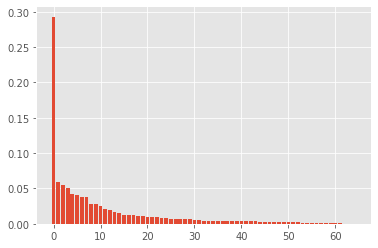

In [ ]:
best_model_RF = clfRF_model1 
# get importance
importance = pd.Series(best_model_RF.feature_importances_).reset_index().\
  sort_values(by=0, ascending=False)
# summarize feature importance
for i, row in importance[:10].iterrows():
  print(f'Score: {row[0]:.5%}, Feature: {X.columns[row["index"]]}')
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance[0])
pyplot.show()

***Predicción RF All Features  - Unbalanced dataset***

In [ ]:
pred_clf_rf=clfRF_model1.predict(X_test)
pred_clf_RF_test = clfRF_model1.predict(X_test)
pred_clf_RF_train = clfRF_model1.predict(X_train)

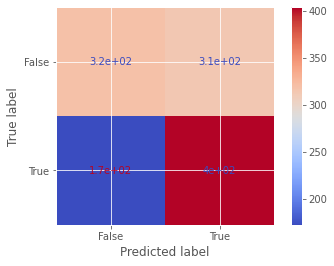

In [ ]:
from sklearn.metrics import (mean_squared_error,confusion_matrix, plot_confusion_matrix, f1_score)

plot_confusion_matrix(clfRF_model1, X_test, y_test['reincidencia'], cmap='coolwarm');

In [ ]:
target_names = ['No_reincide', 'Reincide']


print('_'*20,'pred_clf_rf','_'*20)
print(classification_report(y_test['reincidencia'], pred_clf_rf, target_names=target_names))
print('_'*60,'\n')

____________________ pred_clf_rf ____________________
              precision    recall  f1-score   support

 No_reincide       0.65      0.50      0.57       634
    Reincide       0.56      0.70      0.62       577

    accuracy                           0.60      1211
   macro avg       0.61      0.60      0.60      1211
weighted avg       0.61      0.60      0.59      1211

____________________________________________________________ 



In [ ]:
score_result = dict()
print_score(y_train, pred_clf_RF_train, train=True)
print_score(y_test, pred_clf_RF_test, train=False)

score_result['RF'] = {
        'Train': accuracy_score(y_train,pred_clf_RF_train),
        'Test': accuracy_score(y_test, pred_clf_RF_test)}


Train Result:
Accuracy Score: 68.85%
_______________________________________________
Classification Report:
                 False         True  accuracy    macro avg  weighted avg
precision     0.712479     0.671141  0.688496     0.691810      0.691393
recall        0.610549     0.763359  0.688496     0.686954      0.688496
f1-score      0.657588     0.714286  0.688496     0.685937      0.686509
support    1384.000000  1441.000000  0.688496  2825.000000   2825.000000
_______________________________________________
Confusion Matrix: 
 [[ 845  539]
 [ 341 1100]]

Test Result:
Accuracy Score: 59.79%
_______________________________________________
Classification Report:
                False        True  accuracy    macro avg  weighted avg
precision    0.649087    0.562674  0.597853     0.605881      0.607914
recall       0.504732    0.700173  0.597853     0.602453      0.597853
f1-score     0.567879    0.623938  0.597853     0.595909      0.594589
support    634.000000  577.000000  0.597

In [ ]:
print(df[df.cod_dpto == 13]['reincidencia'].value_counts(normalize=True))
print(df[df.cod_dpto != 13]['reincidencia'].value_counts(normalize=True))
df.cod_dpto.value_counts(normalize=True)

False    0.996834
True     0.003166
Name: reincidencia, dtype: float64
False    0.99802
True     0.00198
Name: reincidencia, dtype: float64


5.0     0.125614
11.0    0.113966
76.0    0.056248
23.0    0.051647
13.0    0.048132
47.0    0.045799
41.0    0.045456
25.0    0.043052
68.0    0.040201
20.0    0.038909
52.0    0.038702
70.0    0.037289
8.0     0.035462
54.0    0.034556
19.0    0.031222
44.0    0.029476
73.0    0.028966
15.0    0.028213
50.0    0.025231
27.0    0.021673
17.0    0.017449
18.0    0.014586
86.0    0.011132
85.0    0.009685
81.0    0.009261
63.0    0.008058
66.0    0.004877
91.0    0.001344
95.0    0.001156
88.0    0.001074
99.0    0.000731
94.0    0.000469
97.0    0.000363
Name: cod_dpto, dtype: float64

In [ ]:
tt.iloc[3590575]

Vigencia                                                                         2018
IdBeneficiario                                                               12773925
Id                                                                            1715662
TipoBeneficiario                                                                  NaN
FechaNacimiento                                                   2015-08-14 00:00:00
Sexo                                                                                F
CodigoPaisNacimientoBeneficiario                                                  169
PaisNacimientoBeneficiario                                                   Colombia
PresentaDiscapacidad                                                               NO
ZonaUbicacionBeneficiario                                                    CABECERA
GrupoEtnico                           NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES
MesesLactanciaMaternaExclusiva                        

In [ ]:
tt = pd.read_parquet(f'preprocessed_data/TomasDPI_pre.parquet')
tt.iloc[64795]

Vigencia                                                            2017
IdBeneficiario                                                   5600669
Id                                                                  <NA>
TipoBeneficiario                                                     NaN
FechaNacimiento                                      2012-08-12 00:00:00
Sexo                                                                   F
CodigoPaisNacimientoBeneficiario                                     169
PaisNacimientoBeneficiario                                      Colombia
PresentaDiscapacidad                                                  NO
ZonaUbicacionBeneficiario                                          RESTO
GrupoEtnico                                                     INDIGENA
MesesLactanciaMaternaExclusiva                                         6
MesesLactanciaMaternaTotal                                            24
PesoBeneficiarioAlNacer                            

In [ ]:
print(df[df.cod_mpio == 11001]['reincidencia'].value_counts(normalize=True))
print(df[df.cod_mpio != 11001]['reincidencia'].value_counts(normalize=True))
df2.porc_gasto_alim.groupby(df2['reincidencia']).mean()
df[-2018:].groupby('reincidencia').porc_gasto_alim.mean()


False    0.998415
True     0.001585
Name: reincidencia, dtype: float64
False    0.997905
True     0.002095
Name: reincidencia, dtype: float64


reincidencia
False    73.823821
True     70.333333
Name: porc_gasto_alim, dtype: float64